In [25]:
import pandas as pd
import numpy as np
import netCDF4 as ncd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# Hypothesis 2

In [2]:
precipitation_url='http://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2023.nc'
temperature_url='http://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_temp/tmax.2023.nc'
precipitation_url='precip.2023.nc'
temperature_url='tmax.2023.nc'


In [3]:
data_temp = ncd.Dataset(temperature_url, 'r')

In [4]:
dict_c = {'Corpus_Christi': {'lat': 126, 'lon': 524},
        'San Diego': {'lat': 114, 'lon': 486},
        'Lisbon': {'lat': 102, 'lon': 711},
        'kl': {'lat': 168, 'lon': 202},
        'singapore': {'lat': 178, 'lon': 206},
        'pekanbaru': {'lat': 180, 'lon': 202}
       }

In [5]:
main_df = pd.DataFrame()

main_df['Corpus_Christi_temp'] = data_temp['tmax'][:, dict_c['Corpus_Christi']['lat'], dict_c['Corpus_Christi']['lon']]
main_df['singapore_temp'] = data_temp['tmax'][:, dict_c['singapore']['lat'], dict_c['singapore']['lon']]
main_df['San_Diego_temp'] = data_temp['tmax'][:, dict_c['San Diego']['lat'], dict_c['San Diego']['lon']]

main_df['kl_temp'] = data_temp['tmax'][:, dict_c['kl']['lat'], dict_c['kl']['lon']]
main_df['Lisbon_temp'] = data_temp['tmax'][:, dict_c['Lisbon']['lat'], dict_c['Lisbon']['lon']]
main_df['pekanbaru_temp'] = data_temp['tmax'][:, dict_c['pekanbaru']['lat'], dict_c['pekanbaru']['lon']]

main_df.head(3)

Corpus_Christi_temp  singapore_temp  San_Diego_temp    kl_temp  \
0            28.288410       30.679363       11.689861  29.604944   
1            30.005768       31.763016       11.687356  29.568554   
2            29.749529       31.944313       12.060501  30.247627   

   Lisbon_temp  pekanbaru_temp  
0    16.314077       30.655664  
1    11.522928       31.035549  
2    12.043359       30.375317

In [6]:
x=[i for i in range(1,366)]

y_min = main_df.min().min()
y_max = main_df.max().max()


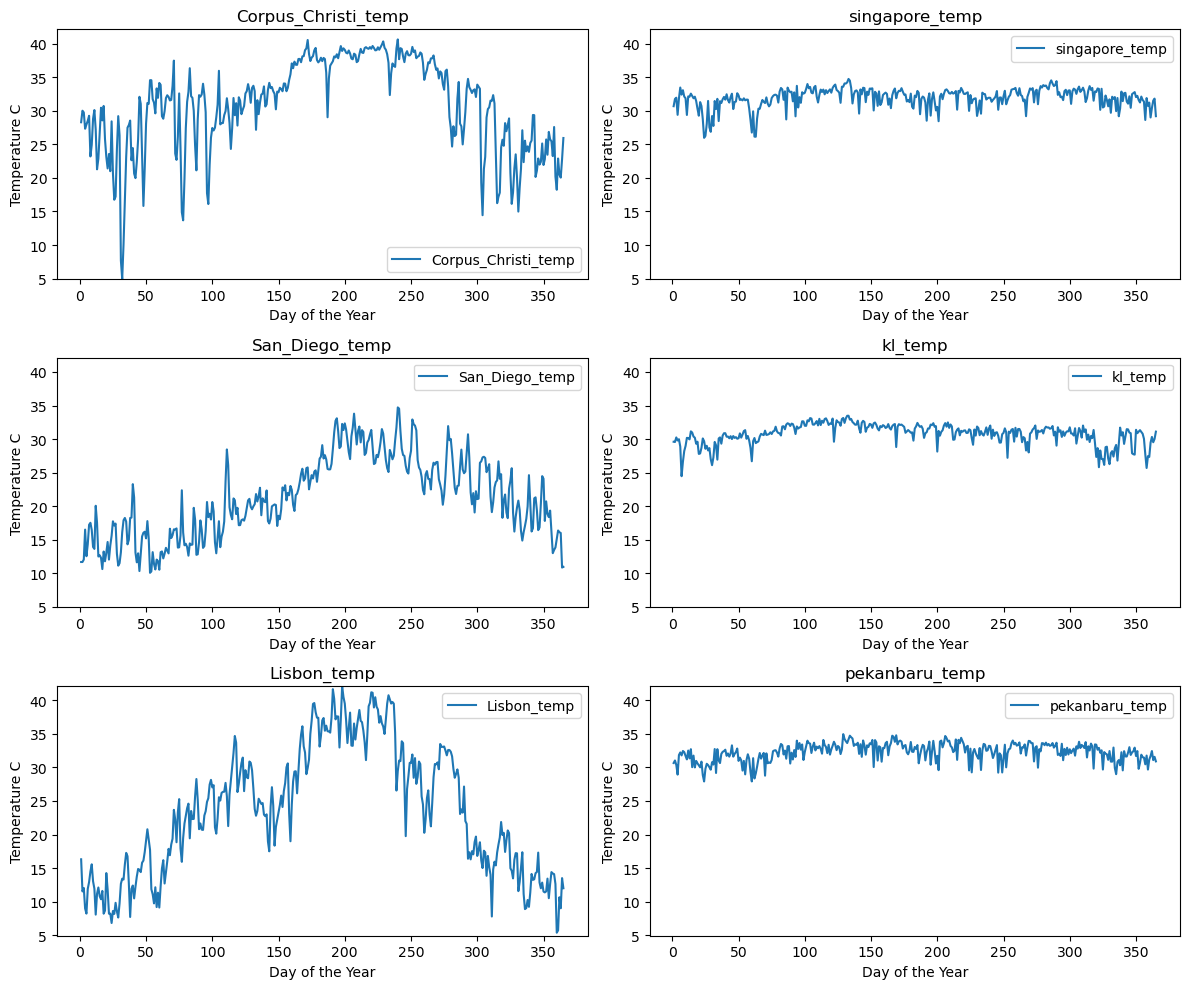

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(main_df.columns):  # Exclude the 'Date' column
    ax = axs[i]
    ax.plot(x, main_df[col], label=col)
    ax.set_xlabel('Day of the Year')
    ax.set_ylabel('Temperature C')
    ax.set_ylim(y_min, y_max)
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
threshold = 3  

temp_diff = main_df.diff(axis=0)

fluctuations = (temp_diff.abs() > threshold).astype(int)

fluctuation_counts = fluctuations.sum()

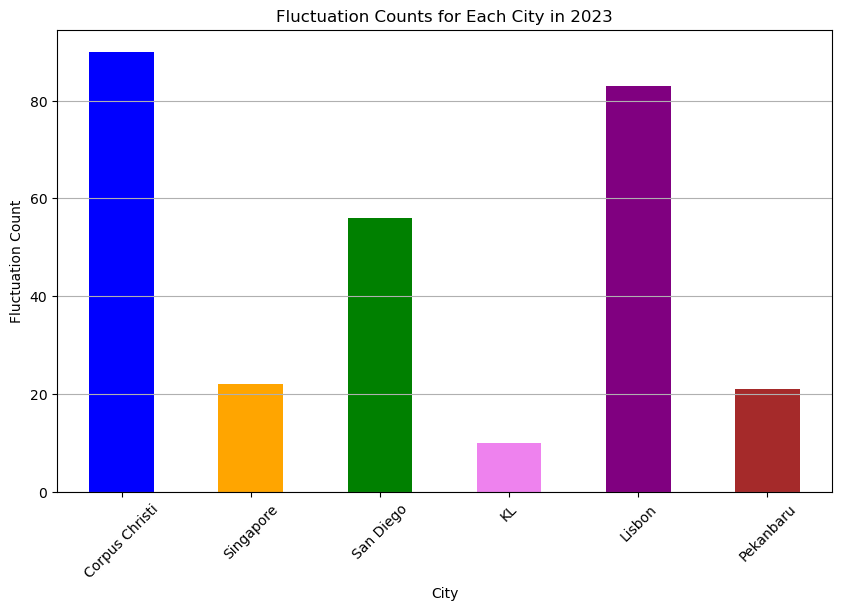

In [9]:
fluctuation_counts.index = ['Corpus Christi', 'Singapore', 'San Diego', 'KL', 'Lisbon', 'Pekanbaru']

colors = ['blue', 'orange', 'green', 'violet', 'purple', 'brown']

plt.figure(figsize=(10, 6))
fluctuation_counts.plot(kind='bar', color=colors)
plt.title('Fluctuation Counts for Each City in 2023')
plt.xlabel('City')
plt.ylabel('Fluctuation Count')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

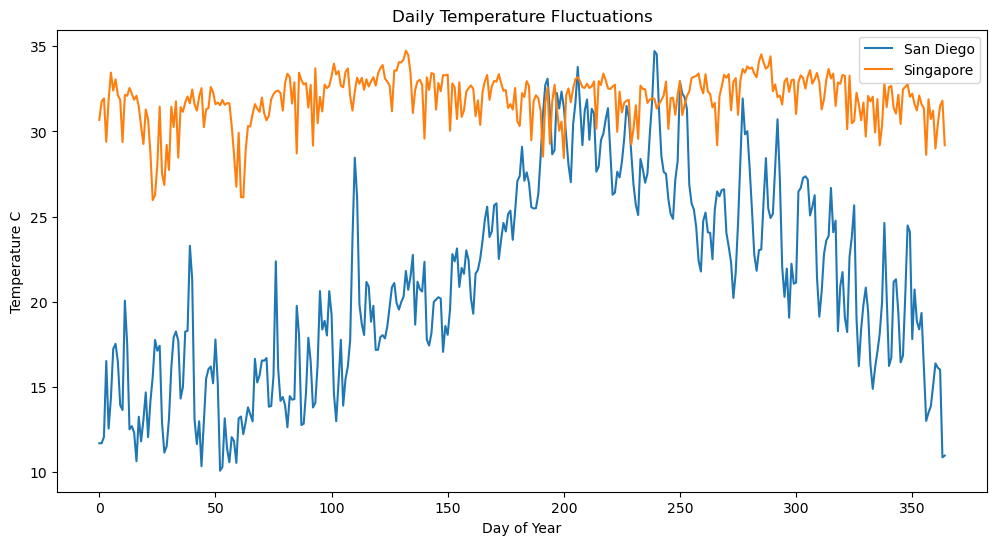

There is a significant difference in temperature variability between the two cities.


In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=main_df['San_Diego_temp'], label='San Diego')
sns.lineplot(data=main_df['singapore_temp'], label='Singapore')
plt.xlabel('Day of Year')
plt.ylabel('Temperature C')
plt.title('Daily Temperature Fluctuations')
plt.legend()
plt.show()

# Perform a t-test
t_stat, p1 = ttest_ind(main_df['San_Diego_temp'], main_df['singapore_temp'])
if p1 < 0.05:
    print("There is a significant difference in temperature variability between the two cities.")
else:
    print("There is no significant difference in temperature variability between the two cities.")

In [11]:
p1

3.16554626778178e-148

In [12]:
equator_std = np.std(main_df['San_Diego_temp'])
non_equator_std = np.std(main_df['singapore_temp'])

# Perform t-test
t_stat, p_val = ttest_ind(main_df['San_Diego_temp'], main_df['singapore_temp'])

# Print results
print("Equator Temperature Standard Deviation:", equator_std)
print("Non-Equator Temperature Standard Deviation:", non_equator_std)
print("T-statistic:", t_stat)
print("P-value:", p_val)

Equator Temperature Standard Deviation: 5.948573112487793
Non-Equator Temperature Standard Deviation: 1.4689749479293823
T-statistic: -33.25974535575668
P-value: 3.16554626778178e-148


# Hypothesis 11

In [3]:
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

main_df = pd.DataFrame(index=dates)

main_df['cc_pm2.5'] = np.NAN 


In [9]:
cc_pm_file_address="cc_pm_2023.csv"
san_pm_file_address="san_francisco_oakland_haywardPM2.5_2023.csv"

san_pm = pd.read_csv(san_pm_file_address)
cc_pm = pd.read_csv(cc_pm_file_address)

In [10]:
san_pm['Date'] = pd.to_datetime(san_pm['Date'])
san_pm.set_index('Date', inplace=True)


In [11]:
cc_pm['Date'] = pd.to_datetime(cc_pm['Date'])
cc_pm.set_index('Date', inplace=True)
cc_pm['average_pm']=cc_pm.iloc[:,:].mean(axis=1)

main_df['cc_pm2.5']= cc_pm['average_pm']
main_df['san_pm2.5']= san_pm['Daily Mean PM2.5 Concentration']

main_df.head(3)

cc_pm2.5  san_pm2.5
2023-01-01  17.380952        3.7
2023-01-02  19.014286        2.7
2023-01-03  14.085714        3.6

In [12]:
precip_url = "http://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2023.nc"
precip_url='precip.2023.nc'

In [13]:
precip_data = ncd.Dataset(precip_url)

In [14]:
# Formula: Lat: (180 - (lat*2))     |||||||     Lon: (720 - (2*lon))
dict_c = {'Corpus_Christi': {'lat': 126, 'lon': 524},
        'San_Francisco': {'lat': 106, 'lon': 476},
        'Tehran': {'lat': 110, 'lon': 102},
        'Shiraz': {'lat': 122, 'lon': 104}
       
       }

In [15]:
cc_precip = pd.DataFrame()

In [16]:
main_df['cc_rain_data'] = precip_data['precip'][:, dict_c['Corpus_Christi']['lat'], dict_c['Corpus_Christi']['lon']]
main_df['san_rain_data'] = precip_data['precip'][:, dict_c['San_Francisco']['lat'], dict_c['San_Francisco']['lon']]

In [17]:
# Define a function to find rainy days
def find_rainy_days(precipitation_data):
    rainy_days = np.where(precipitation_data > 0)[0]
    return rainy_days

In [18]:
# Find rainy days
cc_rainy_days_indices = find_rainy_days(main_df['cc_rain_data'])

In [19]:
# Find rainy days
san_rainy_days_indices = find_rainy_days(main_df['san_rain_data'])

In [20]:
main_df['cc_pm_before_rain'] = main_df['cc_pm2.5'].shift(1)
main_df['cc_pm_after_rain'] = main_df['cc_pm2.5'].shift(-1)

main_df['san_pm_before_rain'] = main_df['san_pm2.5'].shift(1)
main_df['san_pm_after_rain'] = main_df['san_pm2.5'].shift(-1)

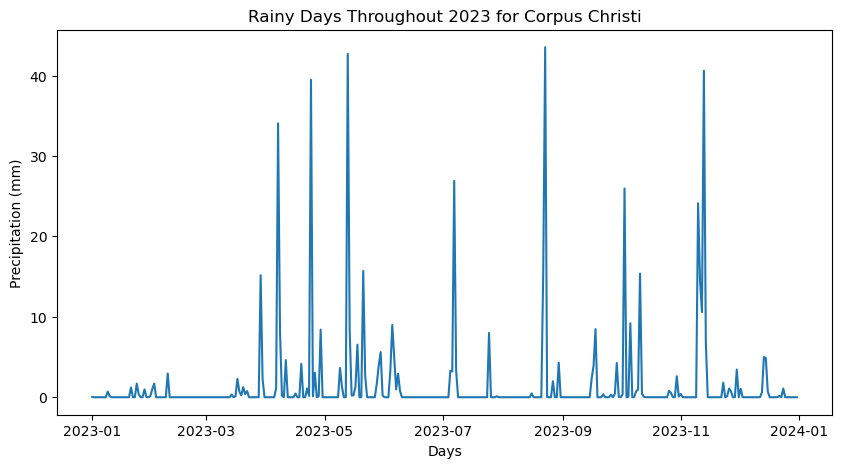

In [21]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=main_df, x=main_df.index, y=main_df['cc_rain_data'] )

plt.title('Rainy Days Throughout 2023 for Corpus Christi')
plt.xlabel('Days')
plt.ylabel("Precipitation (mm)")

# Show plot
plt.show()

In [22]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=main_df, x=main_df.index, y=main_df['cc_pm_before_rain'], label='PM 2.5 Before Rain')
sns.lineplot(data=main_df, x=main_df.index, y=main_df['cc_pm_after_rain'], label='PM 2.5 After Rain')

plt.legend(title='PM 2.5 Before/After Rainy Days')

plt.title('PM 2.5 Level Before/After Rainy Days in Corpus Christi')
plt.xlabel('Days')
plt.ylabel('Micrometers')

plt.show()

In [23]:
def pvalue(city_name, data_before, data_after):
    
    t_statistic, p_value = stats.ttest_rel(data_before, data_after)

    if p_value < 0.05:
        print(f"There is a significant difference in PM2.5 levels before and after rainfall {city_name} city.")
    else:
        print(f"There is no significant difference in PM2.5 levels before and after rainfall {city_name} city.")   
    
    return p_value

In [26]:
filtered_df = main_df[(main_df['cc_pm_before_rain'] > main_df['cc_pm_after_rain']) & (main_df['cc_rain_data']>0)]
p1 = pvalue('Corpus Christi', filtered_df['cc_pm_before_rain'], filtered_df['cc_pm_after_rain'])

There is a significant difference in PM2.5 levels before and after rainfall Corpus Christi city.


In [27]:
filtered_df = main_df[(main_df['san_pm_before_rain'] > main_df['san_pm_after_rain']) & (main_df['san_rain_data']>0)]
p2 = pvalue('San Francisco', filtered_df['san_pm_before_rain'], filtered_df['san_pm_after_rain'])

There is a significant difference in PM2.5 levels before and after rainfall San Francisco city.


In [28]:
p1, p2

(8.419570244179785e-08, 4.694387678926344e-06)

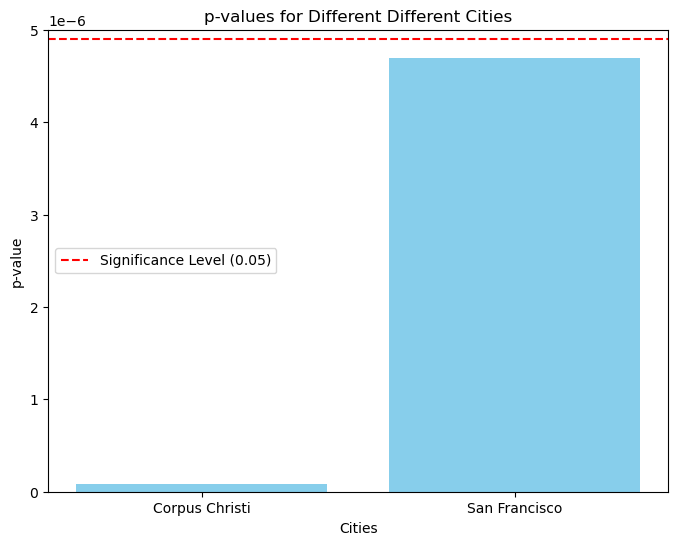

In [29]:
groups = ['Corpus Christi', 'San Francisco']

plt.figure(figsize=(8, 6))
plt.bar(groups, [p1, p2], color='skyblue')
plt.xlabel('Cities')
plt.ylabel('p-value')
plt.title('p-values for Different Different Cities')
plt.ylim(0, 0.000005)  # Set the y-axis limits
plt.axhline(y=0.0000049, color='r', linestyle='--', label='Significance Level (0.05)')  # Add a horizontal line for significance level
plt.legend()
plt.show()